# Persian Spotify Analysis
Alright, listen up folks! We're about to dive into some serious data analysis and machine learning. We'll start with some EDA to get to know the data, and then we'll use machine learning to extract some juicy insights. So, let's not waste any time and get this journey started!

<div align="center">
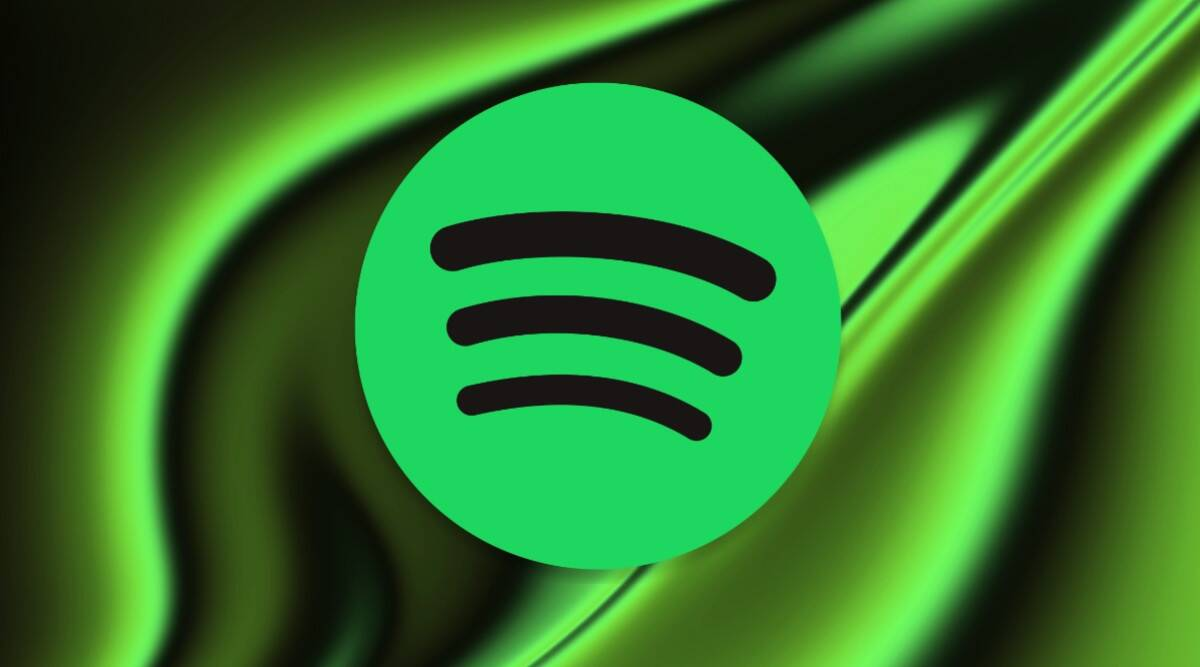
</div>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)
from pprint import pprint 

In [2]:
%pwd

'E:\\Term 8\\Data Mining\\DM_Project'

# Load Spotify Dataset (CSV file)

In [3]:
spotify_df = pd.read_csv("Spotfiy_Persian_Artists.csv")
spotify_df.describe()

,disc_number,duration_ms,popularity,track_number,album_total_tracks,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,10632.000000,1.063200e+04,931.000000,10632.000000,931.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,1.069225,2.888011e+05,20.113856,5.576279,9.707841,1981.687453,0.510869,0.496408,5.205982,-10.070847,0.373965,0.069843,0.609586,0.127399,0.193231,0.450537,119.381223,3.666384
std,0.386374,1.695220e+05,10.415865,4.533367,6.744375,232.376793,0.172341,0.241768,3.635221,4.605740,0.483877,0.071078,0.317795,0.284277,0.154764,0.239068,29.831699,0.637143
min,1.000000,3.996000e+03,0.000000,1.000000,1.000000,0.000000,0.000000,0.000975,0.000000,-37.404000,0.000000,0.000000,0.000022,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.035690e+05,13.000000,2.000000,5.000000,2005.000000,0.372000,0.298000,2.000000,-12.665750,0.000000,0.036100,0.332000,0.000000,0.095800,0.256750,95.114750,3.000000
50%,1.000000,2.536180e+05,20.000000,5.000000,10.000000,2010.000000,0.497000,0.489000,5.000000,-9.067000,0.000000,0.044900,0.725000,0.000088,0.133000,0.421000,120.076000,4.000000
75%,1.000000,3.337745e+05,28.000000,8.000000,12.000000,2016.000000,0.652000,0.693000,9.000000,-6.617750,1.000000,0.067225,0.882000,0.014900,0.250000,0.633000,138.032000,4.000000
max,4.000000,3.978450e+06,48.000000,32.000000,55.000000,2020.000000,0.964000,0.998000,11.000000,-0.626000,1.000000,0.939000,0.996000,0.995000,0.992000,0.980000,219.960000,5.000000


# EDA

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It helps us to better understand the given data, so that we can make sense out of it. If EDA is not done properly, it can hamper the further steps in the machine learning model building process. On the other hand, if done well, it may improve the efficacy of everything we do next. In order to perform EDA, we need to follow a systematic approach that involves several techniques. The following are some of the key steps involved in EDA:

1. Data Sourcing: This is the very first step of EDA, where we access data and load it into our system.

2. Data Cleaning: Once we have the data, we need to clean it by removing any inconsistencies, missing values, or outliers.

3. Univariate Analysis: In this step, we analyze each variable in isolation to understand its distribution, central tendency, and spread.

4. Bivariate Analysis: Here, we analyze the relationship between two variables to understand how they are related to each other.

5. Multivariate Analysis: This step involves analyzing the relationship between multiple variables to understand how they are related to each other.

By conducting EDA, we can turn an almost unusable dataset into a completely usable one. EDA helps to clean up a dataset and gives us a better understanding of the variables and the relationships between them. It is a creative process that involves generating questions about the data, searching for answers by visualizing, transforming, and modeling the data, and using what we learn to refine our questions and/or generate new ones.


In this section, we want to explore a bit dataset characteristics. To do so, you will answer specified questions below.

In [4]:
spotify_df.head()

,track_id,disc_number,duration_ms,explicit,track_name,track_name_farsi,artist_name,artist_name_farsi,popularity,track_number,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,key_mode
0,31iPeC6I0AiRW8InOxNKzm,1,446880,False,Ghazale Taze,NaN,Salar Aghili,سالار عقیلی,NaN,1,...,0.0299,0.839,0.000035,0.1360,0.330,131.913,3,C,minor,C minor
1,4Fi46ha8teWYTwk0b8fNPi,1,851920,False,Ayeeneye Hosn,NaN,Salar Aghili,سالار عقیلی,NaN,2,...,0.0414,0.970,0.000360,0.0812,0.346,105.634,4,F,major,F major
2,0lQAe6EslKA7CUsS7SCW6Q,1,293160,False,Tarke Eshgh,NaN,Salar Aghili,سالار عقیلی,NaN,3,...,0.0349,0.664,0.002070,0.1100,0.501,94.651,5,F,minor,F minor
3,6dAFmJdVsKk5ksCpGqnKgO,1,648720,False,Moghbacheye Bade Foroosh,NaN,Salar Aghili,سالار عقیلی,NaN,4,...,0.0451,0.915,0.006580,0.2120,0.445,110.967,5,D,minor,D minor
4,4VSDJGyEdSMB8UL4fDSCvv,1,273480,False,Bigharar,NaN,Salar Aghili,سالار عقیلی,NaN,5,...,0.0334,0.657,0.000008,0.1200,0.410,148.053,1,C,minor,C minor


In [5]:
spotify_df.columns

Index(['track_id', 'disc_number', 'duration_ms', 'explicit', 'track_name',
       'track_name_farsi', 'artist_name', 'artist_name_farsi', 'popularity',
       'track_number', 'album_href', 'album_id', 'album_name',
       'album_release_date', 'album_total_tracks', 'album_release_year',
       'track_href', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       'key_mode'],
      dtype='object')

In [6]:
column_types = spotify_df.dtypes

# Identify categorical columns
categorical_cols = column_types[column_types == 'object'].index.tolist()

# Identify numerical columns
numerical_cols = column_types[column_types != 'object'].index.tolist()
print("Categorical Columns:")
print(categorical_cols)

print("\nNumerical Columns:")
print(numerical_cols)

Categorical Columns:
['track_id', 'track_name', 'track_name_farsi', 'artist_name', 'artist_name_farsi', 'album_href', 'album_id', 'album_name', 'album_release_date', 'track_href', 'key_name', 'mode_name', 'key_mode']

Numerical Columns:
['disc_number', 'duration_ms', 'explicit', 'popularity', 'track_number', 'album_total_tracks', 'album_release_year', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']


In [7]:
missing_values = spotify_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 track_id                  0
disc_number               0
duration_ms               0
explicit                  0
track_name                0
track_name_farsi      10020
artist_name               0
artist_name_farsi         0
popularity             9701
track_number              0
album_href             9701
album_id                  0
album_name                0
album_release_date        0
album_total_tracks     9701
album_release_year        0
track_href                0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
key_name                144
mode_name               144
key_mode                144
dtype: int64


In [8]:
# Define a custom function to extract the year part from the date
def extract_year(date):
    return int(date.split('-')[0])

# Replace album_release_year with year part of album_release_date where album_release_year is 0
spotify_df['album_release_year'] = spotify_df.apply(
    lambda row: extract_year(row['album_release_date']) if row['album_release_year'] == 0 else row['album_release_year'],
    axis=1
)

## Doing some random EDA (visualization)


key_name:
key_name
C     1526
G     1268
A     1208
D     1149
F      935
B      891
E      820
C#     682
A#     633
F#     507
G#     483
D#     386
Name: count, dtype: int64


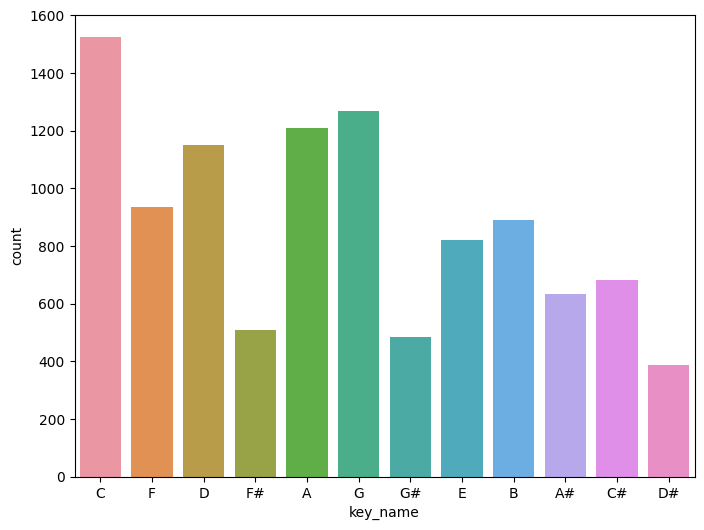


mode_name:
mode_name
minor    6567
major    3921
Name: count, dtype: int64


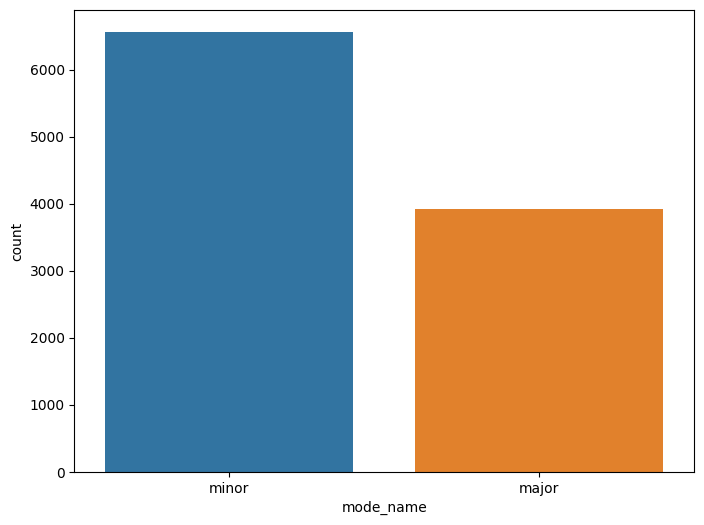


key_mode:
key_mode
A minor     938
C minor     784
C major     742
D minor     732
G minor     705
B minor     676
E minor     669
G major     563
F minor     538
D major     417
F major     397
A# minor    388
C# minor    363
C# major    319
F# minor    308
G# major    272
A major     270
D# minor    255
A# major    245
B major     215
G# minor    211
F# major    199
E major     151
D# major    131
Name: count, dtype: int64


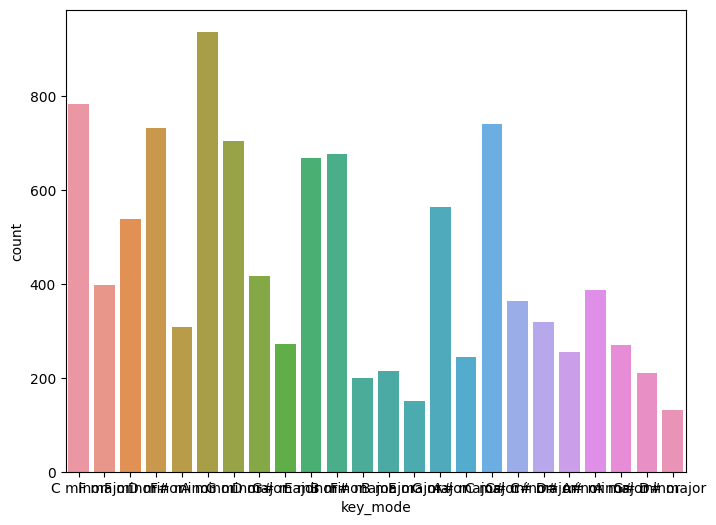

In [9]:
# Univariate Analysis
# Categorical Variables
categorical_cols = ['key_name', 'mode_name', 'key_mode']
for col in categorical_cols:
    value_counts = spotify_df[col].value_counts()
    print(f"\n{col}:\n{value_counts}")

    # Bar plot
    plt.figure(figsize=(8, 6))
    sns.countplot(data=spotify_df, x=col)
    plt.show()


explicit:
count     10632
unique        2
top       False
freq      10611
Name: explicit, dtype: object


<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


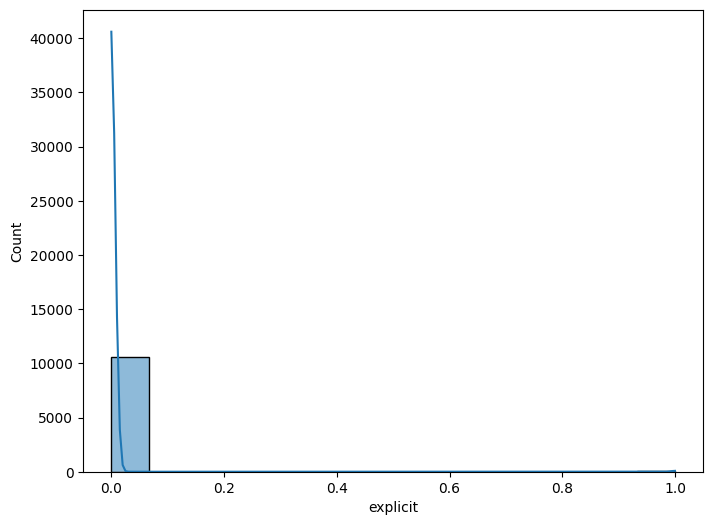


popularity:
count    931.000000
mean      20.113856
std       10.415865
min        0.000000
25%       13.000000
50%       20.000000
75%       28.000000
max       48.000000
Name: popularity, dtype: float64


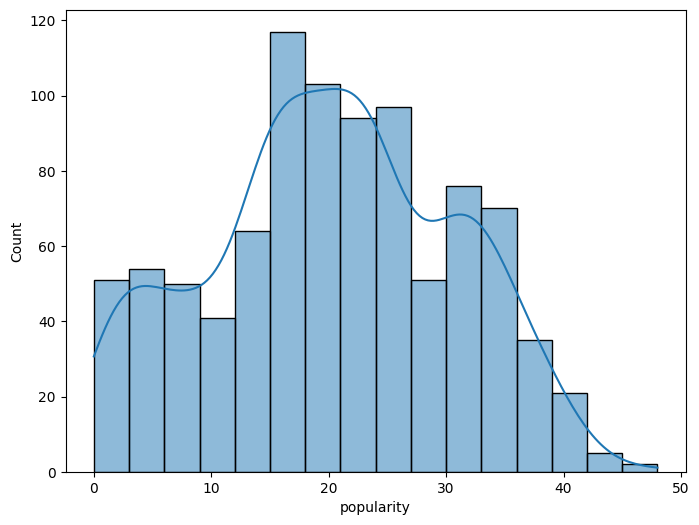


album_total_tracks:
count    931.000000
mean       9.707841
std        6.744375
min        1.000000
25%        5.000000
50%       10.000000
75%       12.000000
max       55.000000
Name: album_total_tracks, dtype: float64


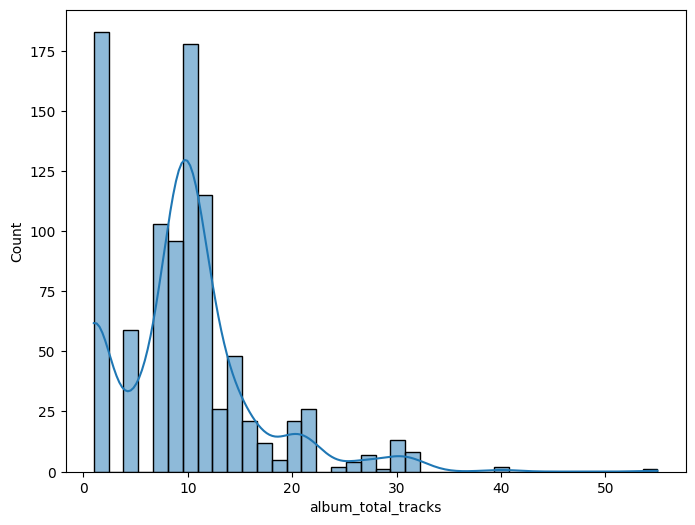


danceability:
count    10632.000000
mean         0.510869
std          0.172341
min          0.000000
25%          0.372000
50%          0.497000
75%          0.652000
max          0.964000
Name: danceability, dtype: float64


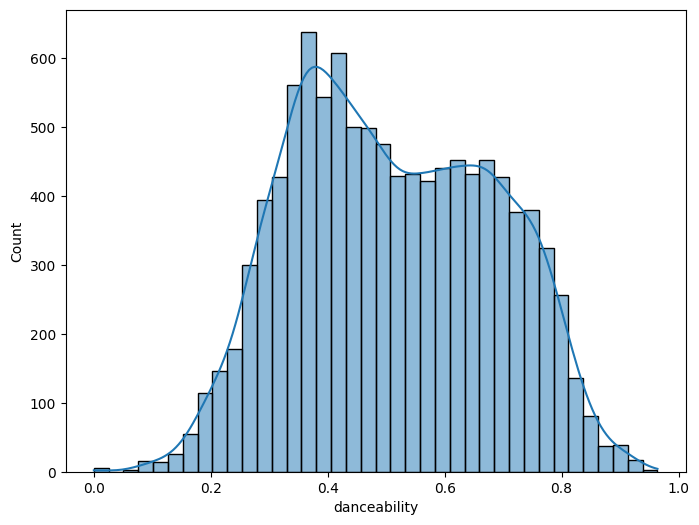


energy:
count    10632.000000
mean         0.496408
std          0.241768
min          0.000975
25%          0.298000
50%          0.489000
75%          0.693000
max          0.998000
Name: energy, dtype: float64


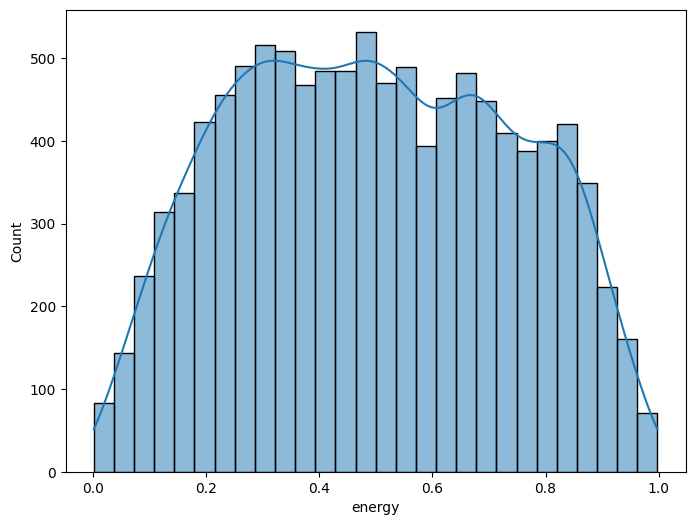


key:
count    10632.000000
mean         5.205982
std          3.635221
min          0.000000
25%          2.000000
50%          5.000000
75%          9.000000
max         11.000000
Name: key, dtype: float64


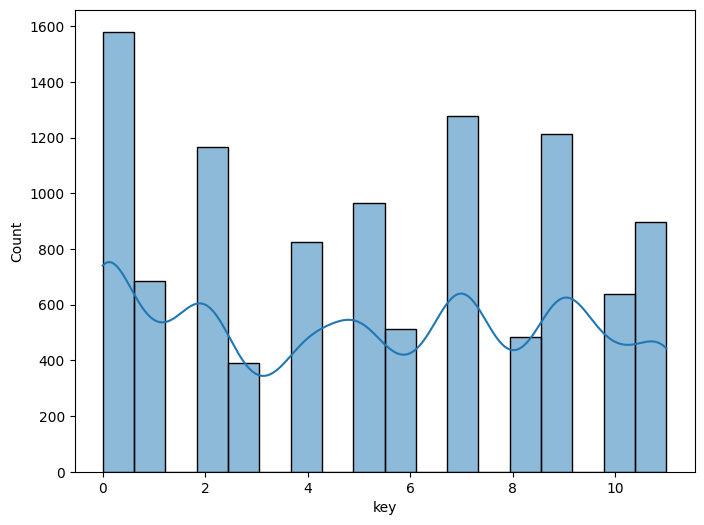


loudness:
count    10632.000000
mean       -10.070847
std          4.605740
min        -37.404000
25%        -12.665750
50%         -9.067000
75%         -6.617750
max         -0.626000
Name: loudness, dtype: float64


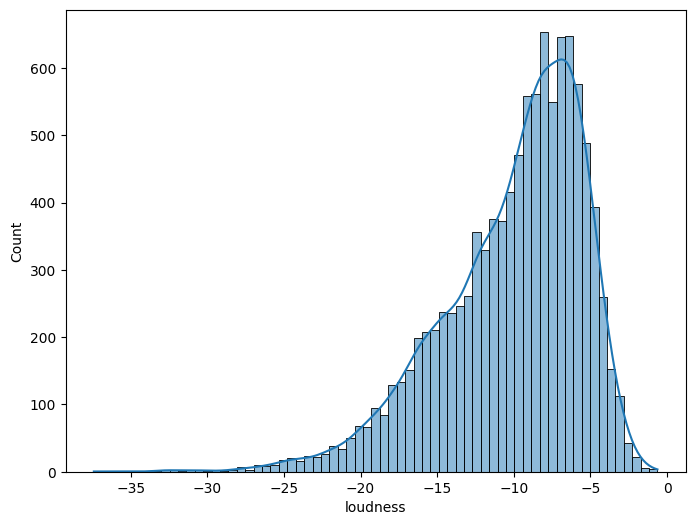


mode:
count    10632.000000
mean         0.373965
std          0.483877
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: mode, dtype: float64


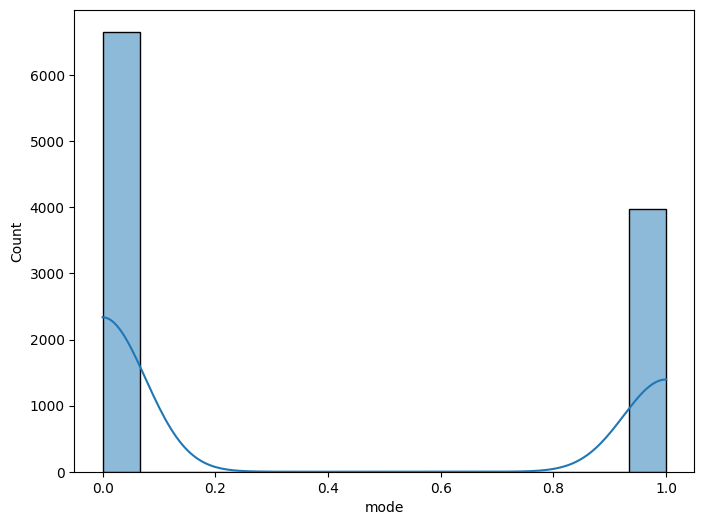


speechiness:
count    10632.000000
mean         0.069843
std          0.071078
min          0.000000
25%          0.036100
50%          0.044900
75%          0.067225
max          0.939000
Name: speechiness, dtype: float64


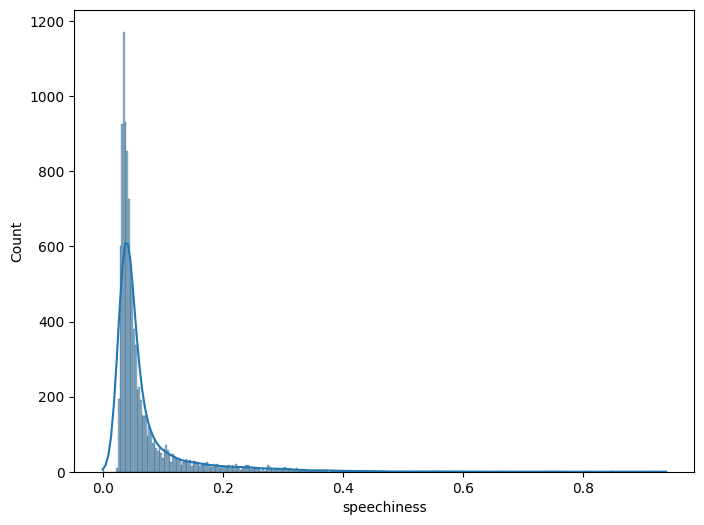


acousticness:
count    10632.000000
mean         0.609586
std          0.317795
min          0.000022
25%          0.332000
50%          0.725000
75%          0.882000
max          0.996000
Name: acousticness, dtype: float64


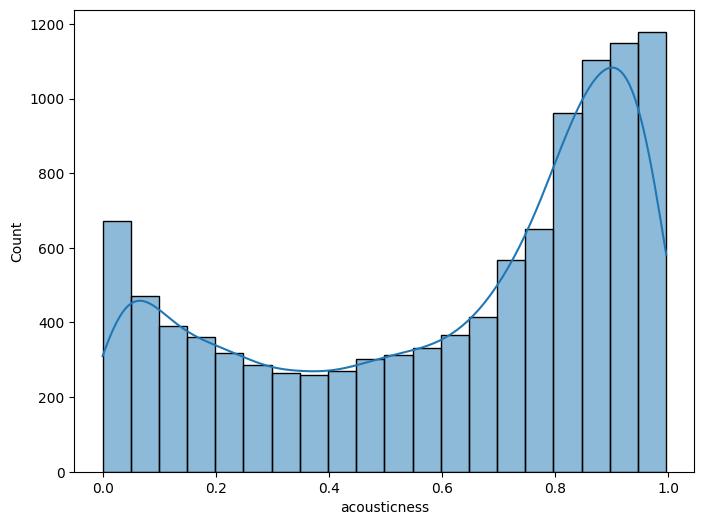


instrumentalness:
count    10632.000000
mean         0.127399
std          0.284277
min          0.000000
25%          0.000000
50%          0.000088
75%          0.014900
max          0.995000
Name: instrumentalness, dtype: float64


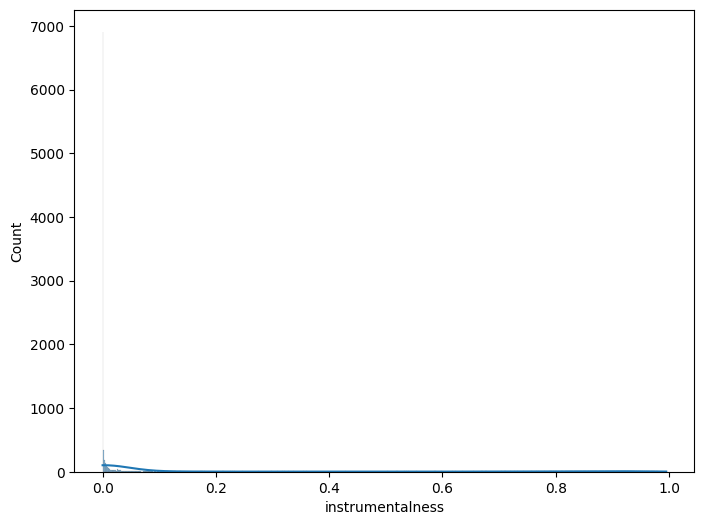


liveness:
count    10632.000000
mean         0.193231
std          0.154764
min          0.000000
25%          0.095800
50%          0.133000
75%          0.250000
max          0.992000
Name: liveness, dtype: float64


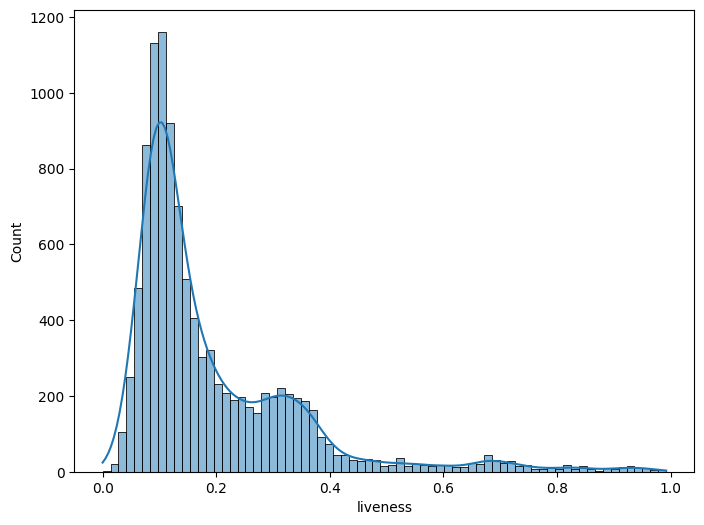


valence:
count    10632.000000
mean         0.450537
std          0.239068
min          0.000000
25%          0.256750
50%          0.421000
75%          0.633000
max          0.980000
Name: valence, dtype: float64


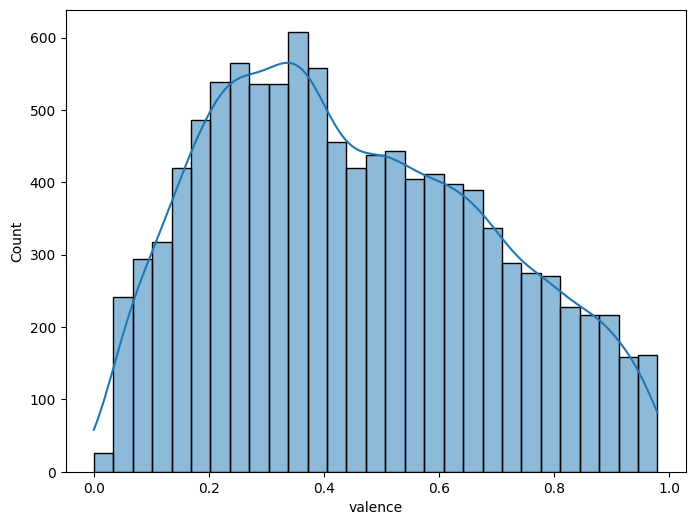


tempo:
count    10632.000000
mean       119.381223
std         29.831699
min          0.000000
25%         95.114750
50%        120.076000
75%        138.032000
max        219.960000
Name: tempo, dtype: float64


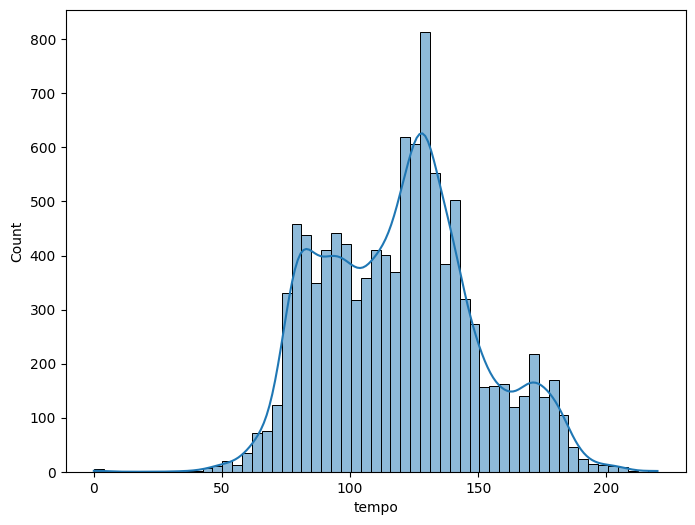


time_signature:
count    10632.000000
mean         3.666384
std          0.637143
min          0.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: time_signature, dtype: float64


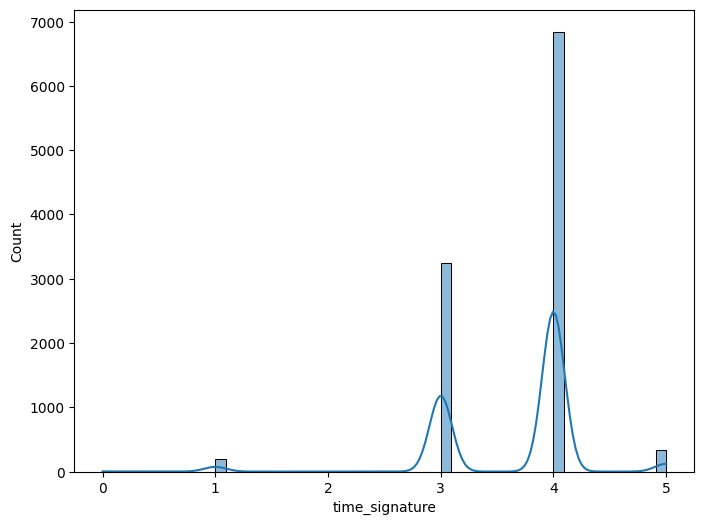

In [10]:
# Numeric Variables
numeric_cols = ['explicit', 'popularity', 'album_total_tracks', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
for col in numeric_cols:
    # Descriptive statistics
    descriptive_stats = spotify_df[col].describe()
    print(f"\n{col}:\n{descriptive_stats}")

    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data=spotify_df, x=col, kde=True)
    plt.show()


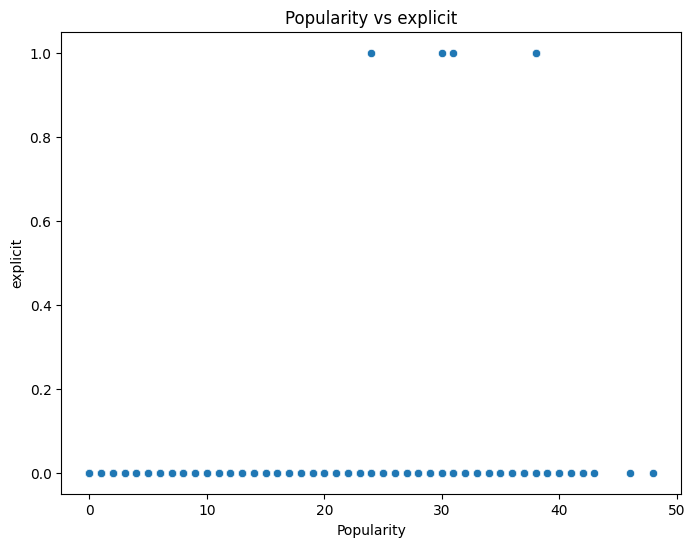

Correlation between Popularity and Energy: 0.08531104947970097


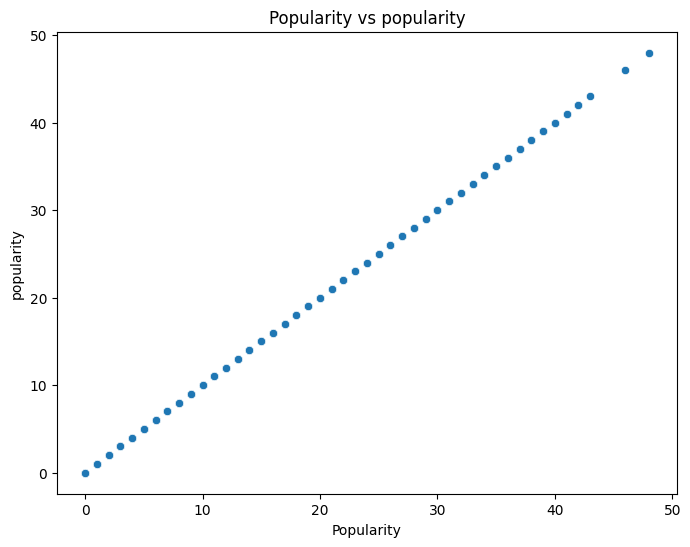

Correlation between Popularity and Energy: 1.0


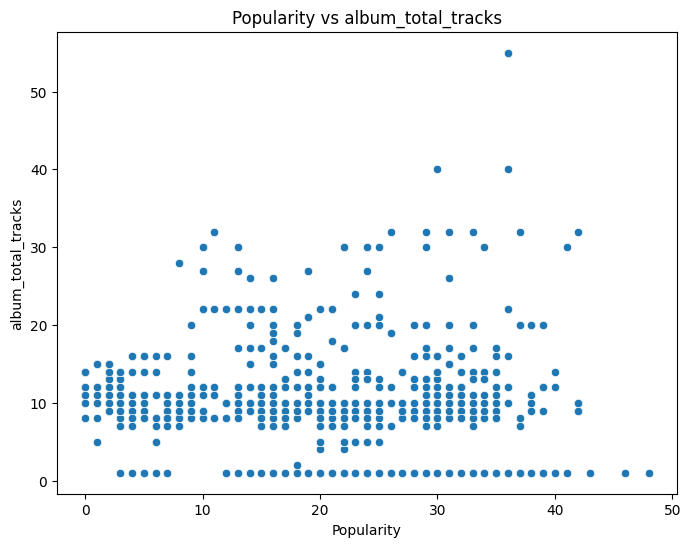

Correlation between Popularity and Energy: -0.09505473748202092


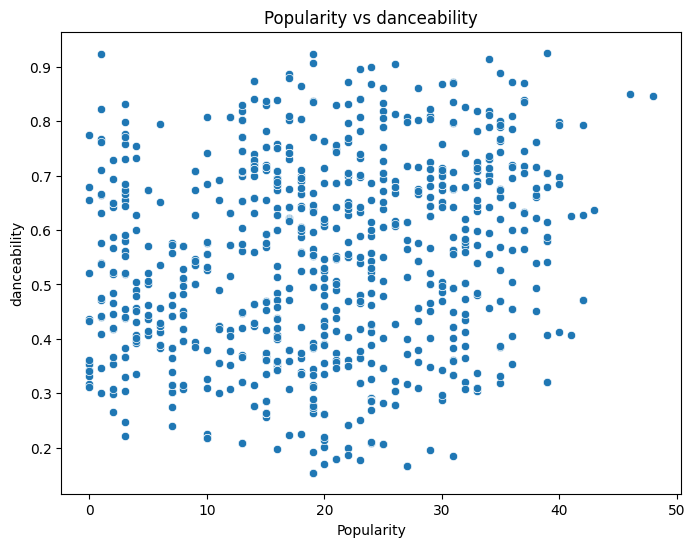

Correlation between Popularity and Energy: 0.16642075544174612


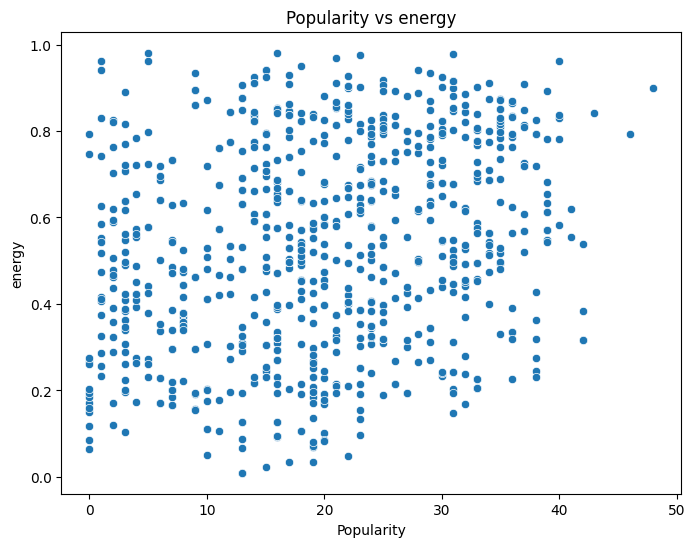

Correlation between Popularity and Energy: 0.22351521448276224


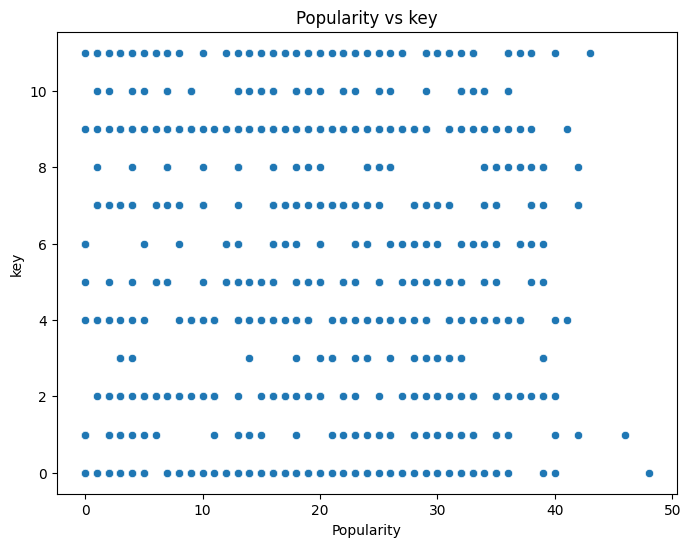

Correlation between Popularity and Energy: -0.005922946395011637


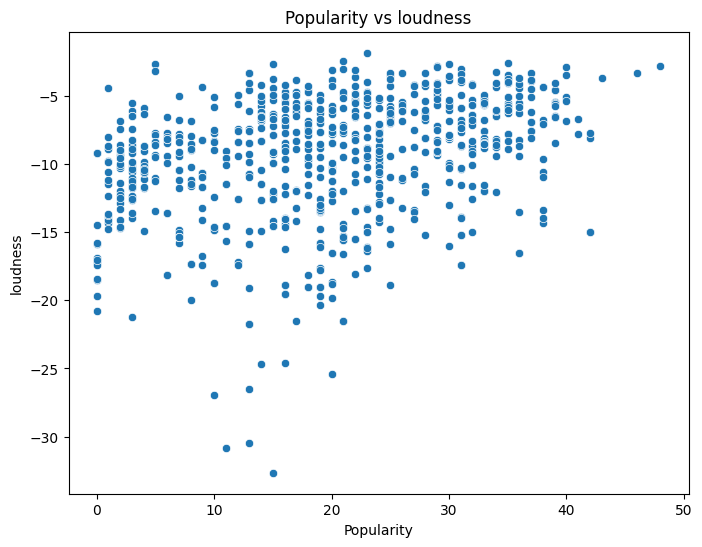

Correlation between Popularity and Energy: 0.345591360824764


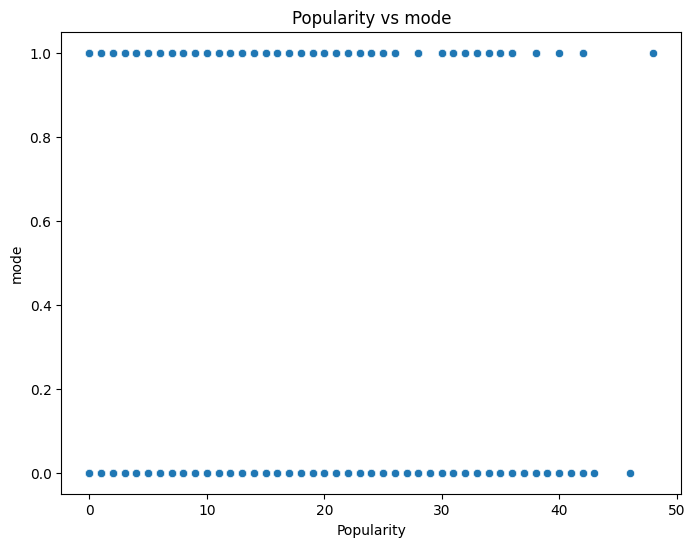

Correlation between Popularity and Energy: -0.1986916742010251


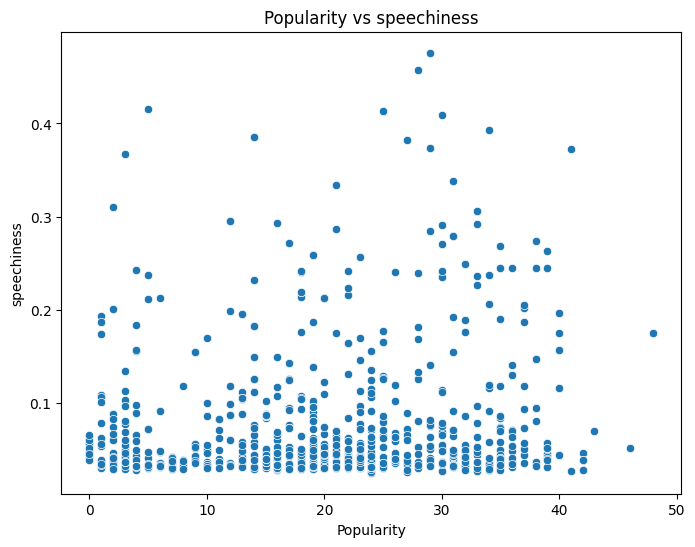

Correlation between Popularity and Energy: 0.11427397707304618


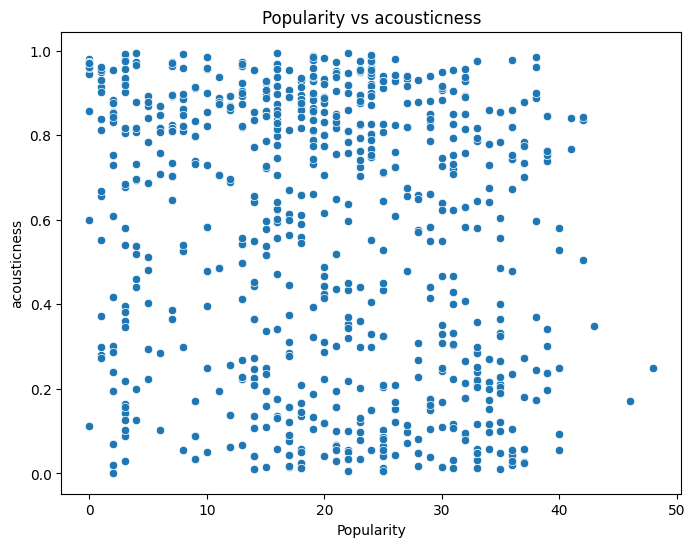

Correlation between Popularity and Energy: -0.16683605784363134


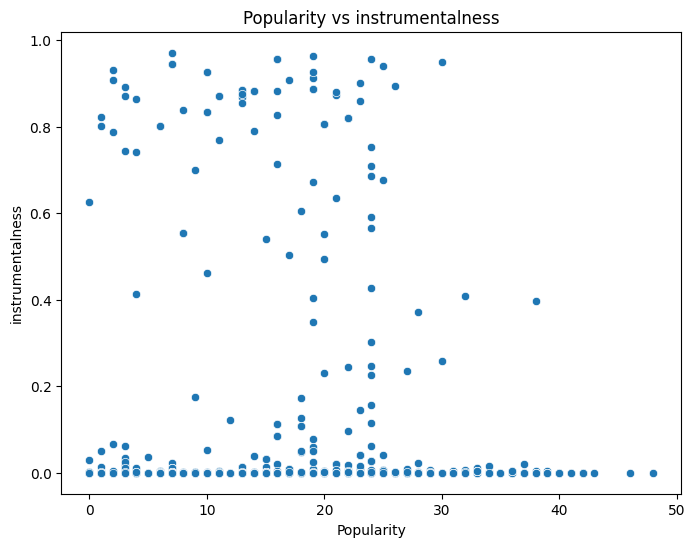

Correlation between Popularity and Energy: -0.13370449639969356


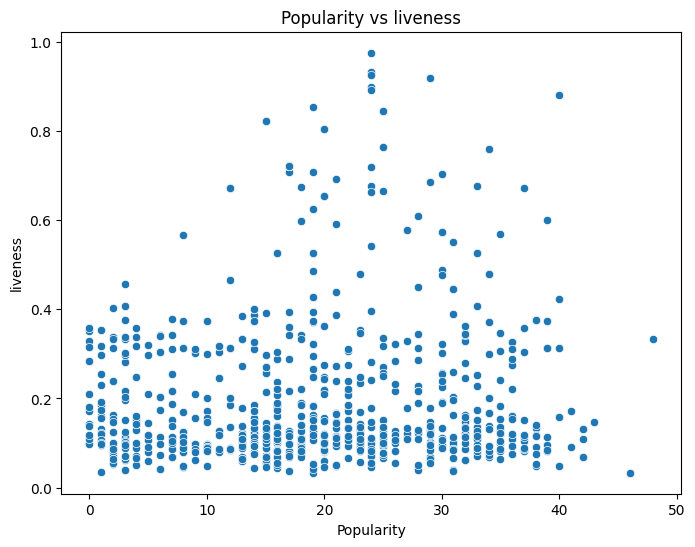

Correlation between Popularity and Energy: 0.06008623080133916


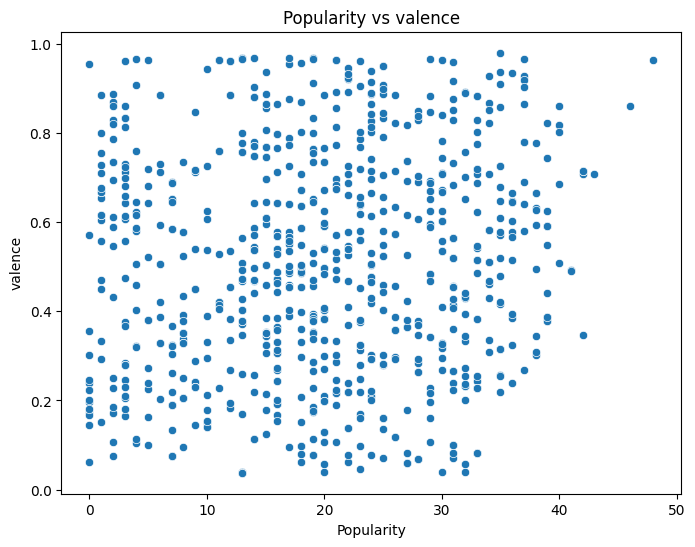

Correlation between Popularity and Energy: 0.07235341119334283


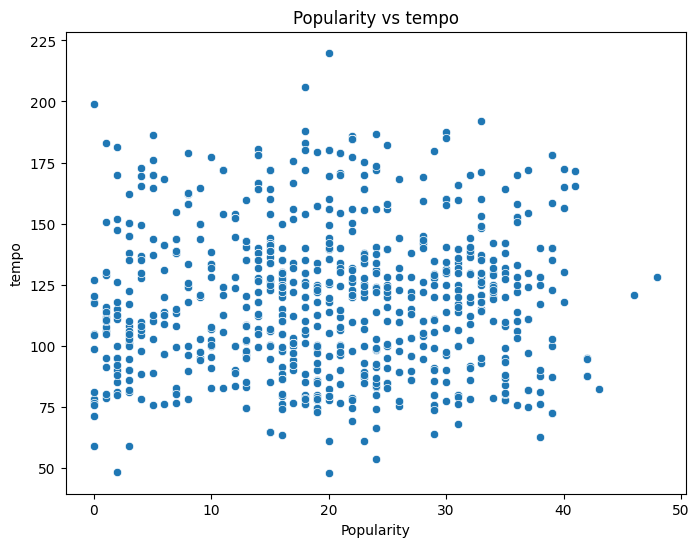

Correlation between Popularity and Energy: 0.03971827835812796


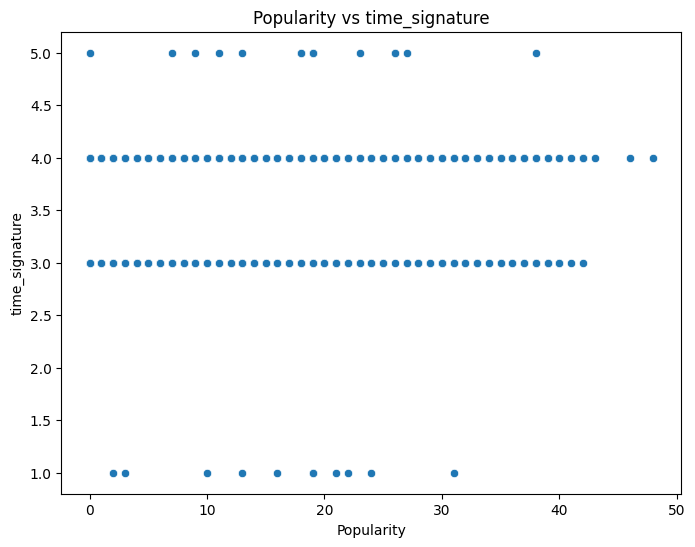

Correlation between Popularity and Energy: 0.05415221203740017


In [11]:
for col in numeric_cols:
    # Bivariate Analysis
    popularity = spotify_df['popularity']
    energy = spotify_df[col]

    # Scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=popularity, y=energy)
    plt.title(f'Popularity vs {col}')
    plt.xlabel('Popularity')
    plt.ylabel(col)
    plt.show()

    # Calculate correlation coefficient
    correlation = popularity.corr(energy)
    print("Correlation between Popularity and Energy:", correlation)


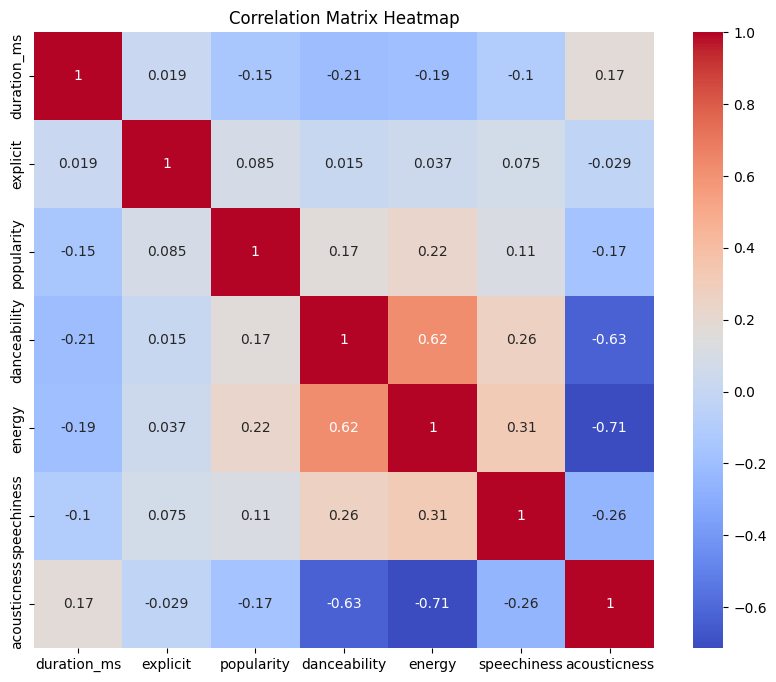

In [12]:
# Multivariate Analysis - Correlation Matrix Heatmap
target_cols = ['duration_ms', 'explicit', 'popularity', 'danceability', 'energy', 'speechiness', 'acousticness']
correlation_matrix = spotify_df[target_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


## Q: Get number of songs by each of the artists in descending order

In [13]:
spotify_df['artist_name'].value_counts().sort_values(ascending=False)

artist_name
Mohammadreza Shajarian    554
Hossein Alizadeh          545
Reza Sadeghi              507
Dariush                   465
Alireza Eftekhari         439
                         ... 
Nasser Abdollahi           22
Mohammad Golriz            17
Ebrahim Monsefi            16
Farman Fathalian           10
Koveyti Poor                9
Name: count, Length: 69, dtype: int64

## Q: Get the average duration of songs by each of the artists in minutes

In [14]:
spotify_df['duration_minutes'] = spotify_df['duration_ms'] / (1000 * 60)
spotify_df.groupby('artist_name')['duration_minutes'].mean()

artist_name
Abbas Ghaderi            5.074705
Abdolhosein Mokhtabad    6.228769
Afshin Moghaddam         4.100780
Ali Lohrasbi             3.602079
Ali Zand Vakili          4.854786
                           ...   
Siavash Ghomayshi        4.341582
Sirvan Khosravi          4.352529
Soheil Nafissi           3.063580
Tohi                     3.523408
Xaniar Khosravi          3.934065
Name: duration_minutes, Length: 69, dtype: float64

## Q: list of artist's unique names

In [15]:
set(spotify_df['artist_name'])

{'Abbas Ghaderi',
 'Abdolhosein Mokhtabad',
 'Afshin Moghaddam',
 'Ali Lohrasbi',
 'Ali Zand Vakili',
 'Alireza Assar',
 'Alireza Eftekhari',
 'Alireza Ghorbani',
 'Amir Tataloo',
 'Amirabbas Golab',
 'Babak Jahanbakhsh',
 'Benyamin Bahadori',
 'Dang Show',
 'Dariush',
 'Ebrahim Monsefi',
 'Ehsan Khajeh Amiri',
 'Faramarz Aslani',
 'Faramarz Assef',
 'Farhad Mehrad',
 'Farman Fathalian',
 'Farzad Farzin',
 'Hamed Homayoun',
 'Hamid Askari',
 'Hamid Hami',
 'Hassan Shamaizadeh',
 'Hatam Asgari',
 'Hesameddin Seraj',
 'Hichkas',
 'Homayoun Shajarian',
 'Hossein Alizadeh',
 'Iraj Bastami',
 'Javad Yassari',
 'Kaveh Deylami',
 'Kayhan Kalhor',
 'Kourosh Yaghmaei',
 'Koveyti Poor',
 'Macan Band',
 'Majid Akhshabi',
 'Mazyar Fallahi',
 'Mehdi Yarrahi',
 'Moein',
 'Mohammad Alizadeh',
 'Mohammad Esfahani',
 'Mohammad Golriz',
 'Mohammad Nouri',
 'Mohammad Reza Lotfi',
 'Mohammadreza Shajarian',
 'Mohsen Chavoshi',
 'Mohsen Namjoo',
 'Mohsen Sharifian',
 'Mohsen Yeganeh',
 'Morteza Pashaei',
 

## Q: Plot average duration of tracks by year

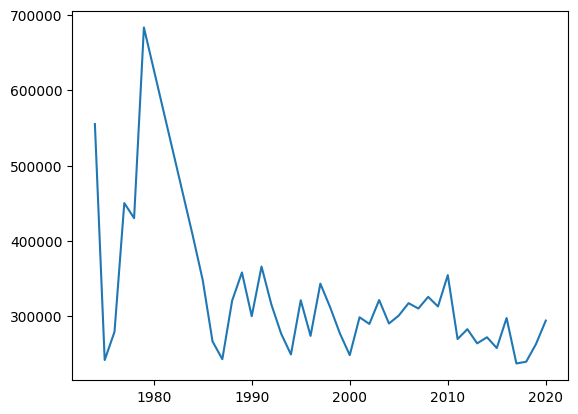

In [16]:
plt.plot(spotify_df.groupby('album_release_year')['duration_ms'].mean())

## Q: Plot average loudness of tracks by year

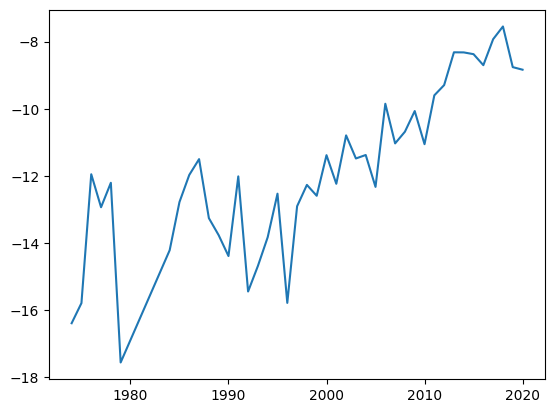

In [17]:
plt.plot(spotify_df.groupby('album_release_year')['loudness'].mean())

## Q: Music attributes of songs over the years


                   acousticness                                          
                          count      mean       std       min      25%   
album_release_year                                                       
1974                        5.0  0.982800  0.013554  0.962000  0.97800  \
1975                       10.0  0.987900  0.005131  0.977000  0.98525   
1976                       13.0  0.879000  0.086924  0.729000  0.79300   
1977                       21.0  0.943143  0.037748  0.863000  0.92900   
1978                        6.0  0.734833  0.147298  0.545000  0.62875   
1979                       15.0  0.977133  0.021209  0.934000  0.96850   
1984                       21.0  0.881143  0.051311  0.728000  0.86300   
1985                       43.0  0.862698  0.206394  0.197000  0.87250   
1986                       91.0  0.743684  0.253442  0.011700  0.68650   
1987                       23.0  0.739696  0.298684  0.173000  0.52400   
1988                       85.0  0.813

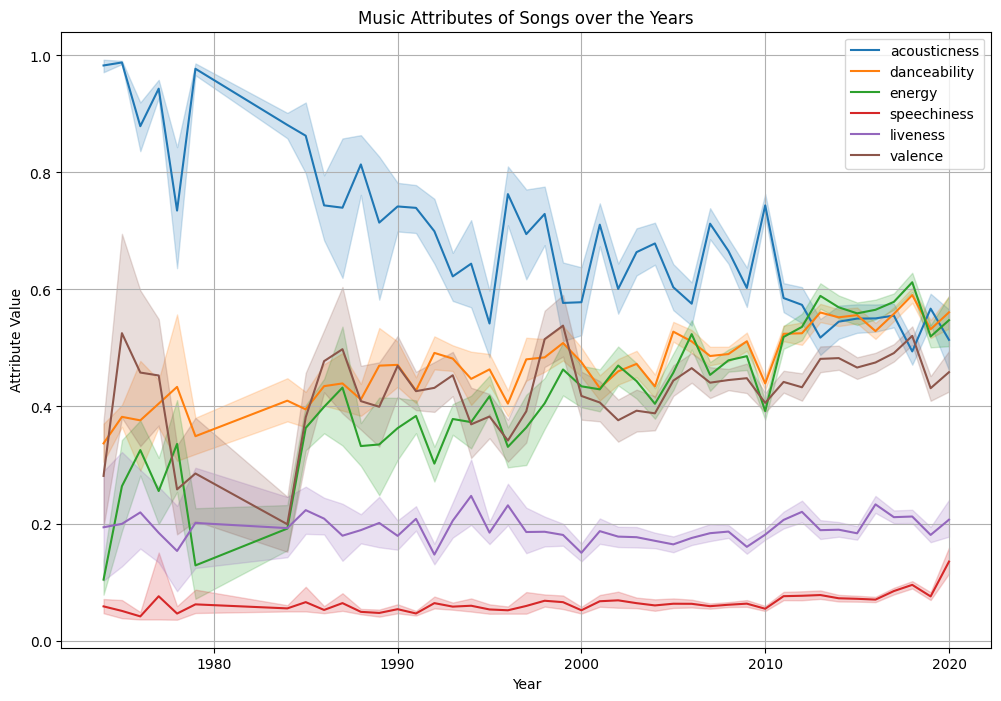

In [18]:
# the columns that we are interseted in
target_cols = ["acousticness","danceability","energy","speechiness","liveness","valence"]

# Group the data by album_release_year and calculate summary statistics for the target columns
yearly_attributes = spotify_df.groupby('album_release_year')[target_cols].describe()

# Print summary statistics
print(yearly_attributes)

# Plot the trends over the years
plt.figure(figsize=(12, 8))
for col in target_cols:
    sns.lineplot(data=spotify_df, x='album_release_year', y=col, label=col)

plt.xlabel('Year')
plt.ylabel('Attribute Value')
plt.title('Music Attributes of Songs over the Years')
plt.legend()
plt.grid(True)


## Q: Plot top 10 popular tracks (Bar Chart)

In [19]:
tracks_popularity = spotify_df['popularity'].sort_values(ascending=False)[:10]

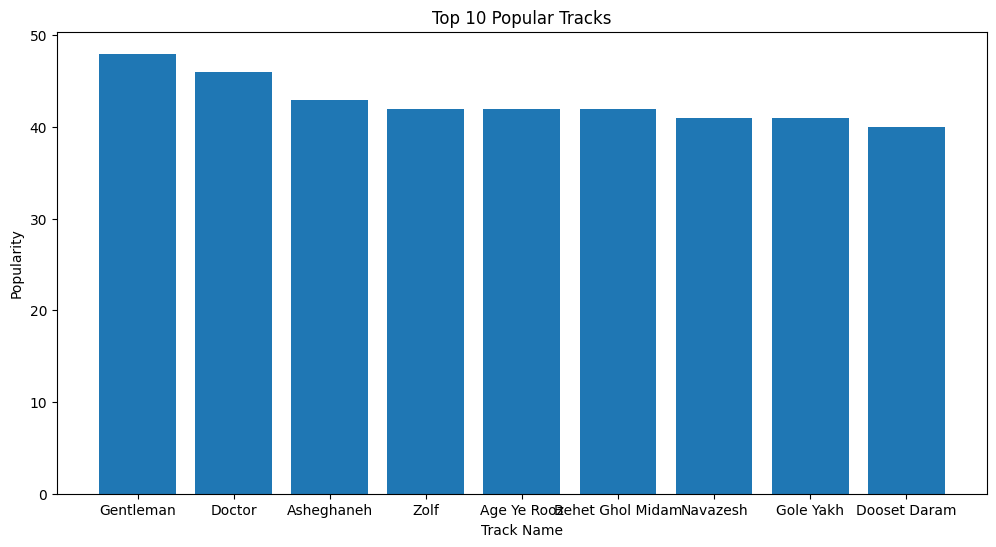

In [20]:
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(spotify_df['track_name'][tracks_popularity.index], tracks_popularity.values)
plt.xlabel('Track Name')
plt.ylabel('Popularity')
plt.title('Top 10 Popular Tracks')
plt.show()

## Q: Plot top 10 popular artist (Bar Chart)

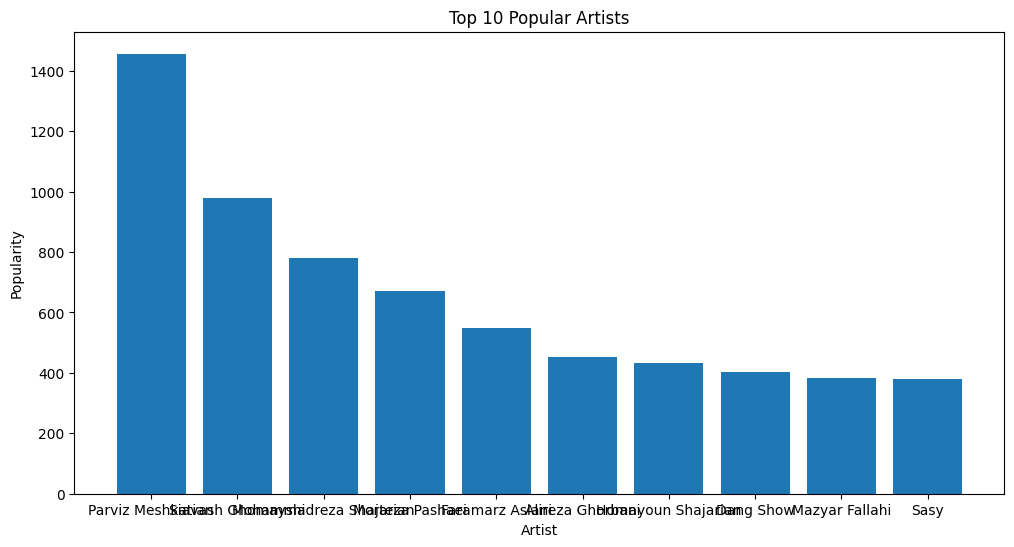

In [21]:
artist_popularity = spotify_df.groupby('artist_name')['popularity'].sum().sort_values(ascending=False)[:10]

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(artist_popularity.index, artist_popularity.values)
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.title('Top 10 Popular Artists')
plt.show()

## Q: Plot correlation matrix's heatmap
What are the most correlated features with `duration_ms` and `popularity`?

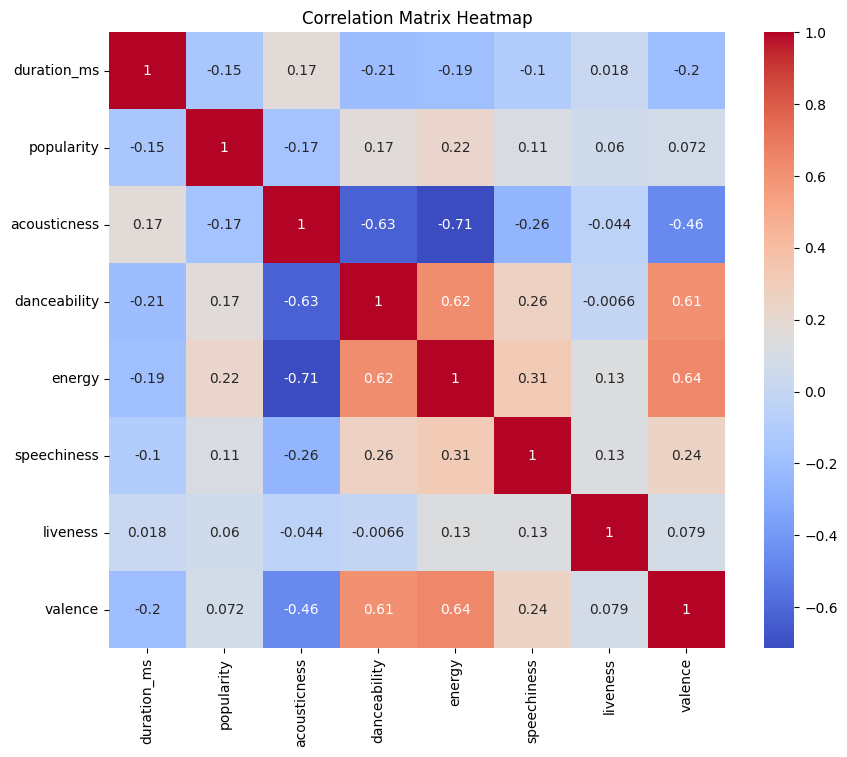

Most correlated features with duration_ms:
acousticness    0.170713
liveness        0.018118
speechiness    -0.102299
popularity     -0.150982
energy         -0.193684
valence        -0.200632
danceability   -0.210401
Name: duration_ms, dtype: float64
Most correlated features with popularity:
energy          0.223515
danceability    0.166421
speechiness     0.114274
valence         0.072353
liveness        0.060086
duration_ms    -0.150982
acousticness   -0.166836
Name: popularity, dtype: float64


In [22]:
import seaborn as sns

# Select the relevant columns for correlation analysis
relevant_cols = ['duration_ms', 'popularity', 'acousticness', 'danceability', 'energy',
                 'speechiness', 'liveness', 'valence']

# Create a correlation matrix
correlation_matrix = spotify_df[relevant_cols].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Find the most correlated features with duration_ms and popularity
most_correlated_duration = correlation_matrix['duration_ms'].sort_values(ascending=False)[1:]
most_correlated_popularity = correlation_matrix['popularity'].sort_values(ascending=False)[1:]

print("Most correlated features with duration_ms:")
print(most_correlated_duration)
print("Most correlated features with popularity:")
print(most_correlated_popularity)


## Q: Plot box-plot for each feature 
Compare box-plot values of `energy` and `liveness`

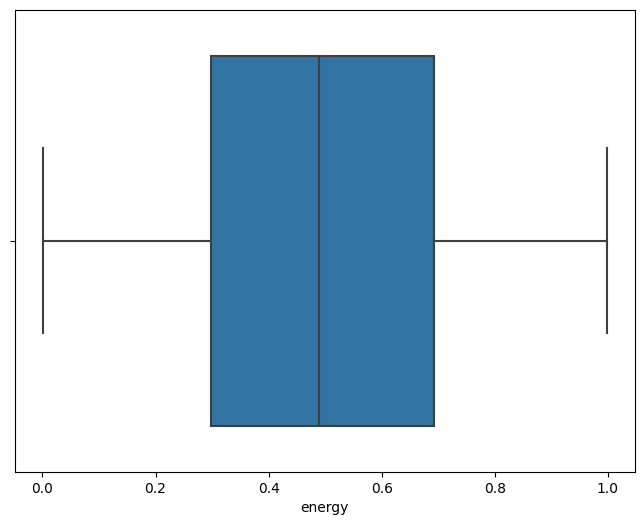

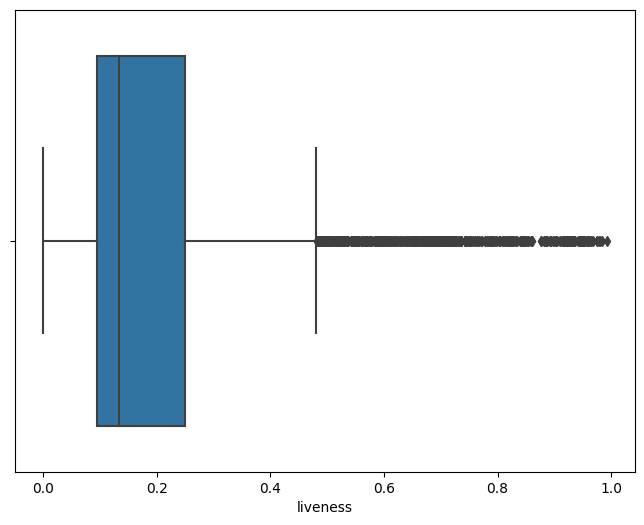

In [23]:
# Categorical-Numeric Variables
cols = ['energy', 'liveness']
for col in cols:
    # Box plot
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=spotify_df, x=col)
    plt.show()

## Q: Missing values 
How many `nan` values are there in each column?

In [24]:
missing_values = spotify_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 track_id                  0
disc_number               0
duration_ms               0
explicit                  0
track_name                0
track_name_farsi      10020
artist_name               0
artist_name_farsi         0
popularity             9701
track_number              0
album_href             9701
album_id                  0
album_name                0
album_release_date        0
album_total_tracks     9701
album_release_year        0
track_href                0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
key_name                144
mode_name               144
key_mode                144
duration_minutes          0
dtype: int64


# Handling nan values of dataframe
- Fill categorical features with "None"
- Fill numerical features with appropriate approach(mean, median or any imputation). Explain your choice.

In [25]:
column_types = spotify_df.dtypes

# Identify categorical columns
categorical_cols = column_types[column_types == 'object'].index.tolist()

spotify_df[categorical_cols] = spotify_df[categorical_cols].fillna('None')

In [26]:
# Identify numerical columns
numerical_cols = column_types[column_types != 'object'].index.tolist()

for col in numerical_cols:
    if spotify_df[col].isnull().any():
        fill_value = spotify_df[col].mean()
        spotify_df[col].fillna(fill_value, inplace=True)

### Reasons:
- Nature of the Data: If the data is normally distributed and does not contain significant outliers, mean imputation can be a reasonable choice.

- Missing Data Pattern: The missing values are missing completely at random (MCAR) or missing at random (MAR), where the missingness is unrelated to the feature itself, mean or median imputation may be appropriate. On the other hand, if the missingness has a specific pattern or is related to other variables, more advanced imputation methods like regression imputation or multiple imputation may be necessary.

- Data Variability: Assess the variability of the numerical feature. If the feature exhibits low variability, imputing missing values with the mean or median may not introduce significant distortions. 

In [27]:
missing_values = spotify_df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 track_id              0
disc_number           0
duration_ms           0
explicit              0
track_name            0
track_name_farsi      0
artist_name           0
artist_name_farsi     0
popularity            0
track_number          0
album_href            0
album_id              0
album_name            0
album_release_date    0
album_total_tracks    0
album_release_year    0
track_href            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
key_name              0
mode_name             0
key_mode              0
duration_minutes      0
dtype: int64


# Determine your desired features here

In [28]:
music_feature_cols = [
       'duration_ms', 'explicit', 'popularity', 'album_release_year',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'key_mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'key_name', 'mode_name',
       
]

In [29]:
tracks_feature_df = spotify_df[music_feature_cols + ['artist_name']].dropna()
tracks_feature_df

,duration_ms,explicit,popularity,album_release_year,danceability,energy,key,loudness,mode,key_mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,key_name,mode_name,artist_name
0,446880,False,20.113856,2020,0.437,0.390,0,-7.170,0,C minor,0.0299,0.839,0.000035,0.1360,0.3300,131.913,3,C,minor,Salar Aghili
1,851920,False,20.113856,2020,0.379,0.146,5,-10.008,1,F major,0.0414,0.970,0.000360,0.0812,0.3460,105.634,4,F,major,Salar Aghili
2,293160,False,20.113856,2020,0.437,0.453,5,-5.392,0,F minor,0.0349,0.664,0.002070,0.1100,0.5010,94.651,5,F,minor,Salar Aghili
3,648720,False,20.113856,2020,0.488,0.138,2,-12.287,0,D minor,0.0451,0.915,0.006580,0.2120,0.4450,110.967,5,D,minor,Salar Aghili
4,273480,False,20.113856,2020,0.301,0.443,0,-5.702,0,C minor,0.0334,0.657,0.000008,0.1200,0.4100,148.053,1,C,minor,Salar Aghili
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,397505,False,20.113856,1985,0.356,0.499,4,-10.805,0,E minor,0.0452,0.946,0.005460,0.3530,0.3960,146.591,5,E,minor,Shahram Nazeri
10628,3522173,False,20.113856,2008,0.318,0.163,5,-17.538,0,F minor,0.0690,0.982,0.061400,0.6670,0.1610,72.379,3,F,minor,Shahram Nazeri
10629,3402706,False,20.113856,2008,0.213,0.218,8,-15.865,1,G# major,0.0350,0.883,0.019400,0.2630,0.1390,86.645,4,G#,major,Shahram Nazeri
10630,3342733,False,20.113856,2008,0.242,0.304,8,-13.286,1,G# major,0.0369,0.842,0.223000,0.7980,0.2100,77.819,3,G#,major,Shahram Nazeri


In [30]:
column_types = tracks_feature_df.dtypes

# Identify categorical columns
categorical_cols = column_types[column_types == 'object'].index.tolist()

In [31]:
categorical_cols

['key_mode', 'key_name', 'mode_name', 'artist_name']

## Feature Preprocessing
In this section, you should preprocess desired features to get suitable for using in machine learning models. 

In [32]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Select the desired features and the target variable
X = tracks_feature_df[music_feature_cols + ['artist_name']]
y = tracks_feature_df['popularity']

# Preprocess the features
numeric_cols = ['duration_ms', 'explicit', 'album_release_year',
       'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']

categorical_cols = ['key_name', 'mode_name', 'key_mode']

# Apply one-hot encoding to categorical features and standard scaling to numeric features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols),
        ('num', StandardScaler(), numeric_cols),
    ])

X_processed = preprocessor.fit_transform(X)
new_columns = numeric_cols+list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))
# Create a new DataFrame with preprocessed features
tracks_feature_df_new = pd.DataFrame(X_processed, columns=new_columns)
tracks_feature_df_new['artist_name'] = tracks_feature_df['artist_name']
tracks_feature_df = tracks_feature_df_new
# Add the target variable to the new DataFrame
tracks_feature_df['popularity'] = y

In [33]:
tracks_feature_df

,duration_ms,explicit,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,key_mode_F minor,key_mode_F# major,key_mode_F# minor,key_mode_G major,key_mode_G minor,key_mode_G# major,key_mode_G# minor,key_mode_None,artist_name,popularity
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.772888,-0.561985,0.721928,-0.448047,-0.369816,-0.504217,0.420102,-1.045944,Salar Aghili,20.113856
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.293849,-0.400182,1.134163,-0.446904,-0.723920,-0.437288,-0.460848,0.523636,Salar Aghili,20.113856
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.772888,-0.491636,0.171232,-0.440888,-0.537822,0.211093,-0.829030,2.093217,Salar Aghili,20.113856
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.772888,-0.348124,0.961087,-0.425022,0.121278,-0.023160,-0.282070,2.093217,Salar Aghili,20.113856
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.772888,-0.512741,0.149205,-0.448140,-0.473204,-0.169569,0.961163,-4.185105,Salar Aghili,20.113856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-0.772888,-0.346717,1.058639,-0.428962,1.032386,-0.228132,0.912152,2.093217,Shahram Nazeri,20.113856
10628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,-0.772888,-0.011856,1.171925,-0.232174,3.061378,-1.211161,-1.575654,-1.045944,Shahram Nazeri,20.113856
10629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.293849,-0.490229,0.860389,-0.379924,0.450827,-1.303190,-1.097415,0.523636,Shahram Nazeri,20.113856
10630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.293849,-0.463496,0.731369,0.336312,3.907869,-1.006189,-1.393289,-1.045944,Shahram Nazeri,20.113856


## Visualize Dataset Features using Dimension Reduction models (e.g. PCA)

(10632, 2)


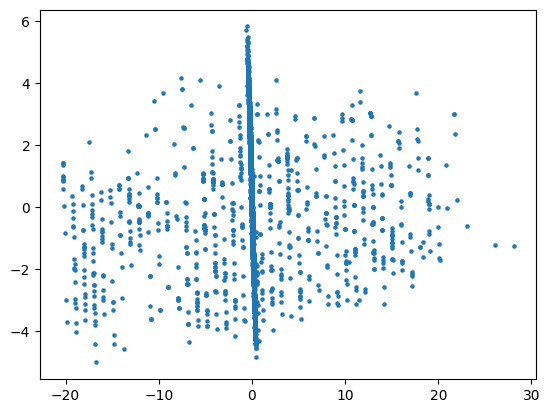

In [34]:
pca = PCA(n_components=2)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)

(10632, 3)


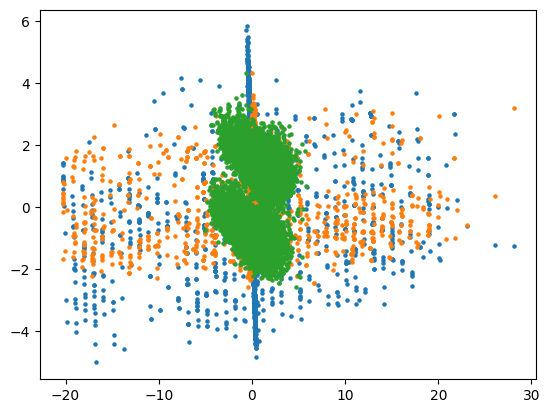

In [35]:
pca = PCA(n_components=3)
tracks_feature_visual = pca.fit_transform(tracks_feature_df.drop(['artist_name'], axis=1))
print(tracks_feature_visual.shape)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 1], s=5)
plt.scatter(tracks_feature_visual[:, 0], tracks_feature_visual[:, 2], s=5)
plt.scatter(tracks_feature_visual[:, 1], tracks_feature_visual[:, 2], s=5)

## Regression

In [36]:
# Set random seed to make results reproducible 
RANDOM_SEED = 42

In [37]:
df = tracks_feature_df
regression_features = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)) \
        + ['energy', 'loudness', 'danceability', 
       ]
x=df.loc[:, regression_features].values
y=df.loc[:,'popularity'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=RANDOM_SEED)

فیچر ها با کورولیشن بیشتر با پاپیولاریتی انتخاب شده اند.

که این فیچر ها و کورولیشن آنها در بخش اول که مربوط به EDA بود رسم شده اند 

In this section, you should use `LinearRegression` class in scikit-learn library to implement regression algorithm. note that you should pass suitable parameters to get better results.

In [111]:
regressor = LinearRegression(
    fit_intercept=True, copy_X=True
)
regressor.fit(x_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

-456767358545.4785
[-4.66328630e+11  6.86483073e+12  3.72692297e+12 -5.78830095e+10
  2.48019886e+11 -1.00905034e+11 -5.05713914e+11 -2.77000238e+12
 -2.39400294e+12 -7.36266795e+12 -1.36965512e+12 -3.55845735e+12
  1.75655885e+10  5.96388546e+11  6.24042944e+12 -2.90836834e+11
 -5.31733345e+12  1.21393282e+12 -1.26484928e+13 -6.11722653e+12
 -9.51058505e+12 -2.97931878e+12 -5.72577907e+12  8.05487202e+11
 -6.03168197e+12  4.99584307e+11 -5.68275705e+12  8.48509226e+11
 -5.27794817e+12  1.25331811e+12 -3.01365970e+12  3.51760657e+12
 -3.38965914e+12  3.14160713e+12  1.57900587e+12  8.11027215e+12
 -4.41400696e+12  2.11725932e+12 -2.22520473e+12  4.30606154e+12
 -1.57186776e+11 -1.51524414e-01  3.57465407e-01  9.22869585e-02]


## Evaluate Regression Algorithm

In [112]:
y_pred = regressor.predict(x_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_output

,Actual,Predicted
0,13.000000,20.210205
1,20.113856,20.250671
2,20.113856,20.285645
3,20.113856,20.091553
4,20.113856,20.167114
...,...,...
3185,20.113856,20.320374
3186,12.000000,20.295410
3187,20.113856,19.438171
3188,20.113856,20.136841


In [113]:
#autograde
#Checking the accuracy of Linear Regression
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.980743150941716
Mean Squared Error: 8.805751584375031
Root Mean Squared Error: 2.967448665836535


# Classification

## Prepare Labels

In [124]:
sonnati_artists = ['Salar Aghili', 'Mohammadreza Shajarian', 'Hesameddin Seraj',
       'Mohammad Esfahani', 'Abdolhosein Mokhtabad', 'Hossein Alizadeh', 
       'Kayhan Kalhor', 'Alireza Eftekhari', 'Iraj Bastami', 'Alireza Ghorbani', 
       'Parviz Meshkatian', 'Mohammad Reza Lotfi', 'Ali Zand Vakili', 'Kaveh Deylami', 
       'Hatam Asgari', 'Homayoun Shajarian', 'Shahram Nazeri']

## Add `is_sonnati` feature column 
Using `sonnati_artist` list, add new feature column `is_sonnati` that determines a song whether a song is sonnati

In [125]:
tracks_feature_df['is_sonnati'] = tracks_feature_df['artist_name'].apply(lambda x: 1 if x in sonnati_artists else 0)

In [126]:
tracks_feature_df.describe()

,duration_ms,explicit,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,key_mode_F minor,key_mode_F# major,key_mode_F# minor,key_mode_G major,key_mode_G minor,key_mode_G# major,key_mode_G# minor,key_mode_None,popularity,is_sonnati
count,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,1.063200e+04,...,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000,10632.000000
mean,-1.336612e-17,-5.346446e-18,5.945248e-15,-2.994010e-16,-5.881091e-17,2.004917e-17,-2.486098e-16,-8.019670e-18,-8.019670e-18,-3.983103e-16,...,0.050602,0.018717,0.028969,0.052953,0.066309,0.025583,0.019846,0.013544,20.113856,0.358728
std,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,1.000047e+00,...,0.219194,0.135530,0.167728,0.223951,0.248834,0.157896,0.139477,0.115593,3.080703,0.479650
min,-1.680127e+00,-4.448683e-02,-4.018282e+00,-2.964434e+00,-2.049304e+00,-1.432162e+00,-5.934864e+00,-7.728879e-01,-9.826719e-01,-1.918195e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.028027e-01,-4.448683e-02,-4.528415e-01,-8.058199e-01,-8.206920e-01,-8.819636e-01,-5.634327e-01,-7.728879e-01,-4.747521e-01,-8.735159e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.113856,0.000000
50%,-2.075528e-01,-4.448683e-02,2.372439e-01,-8.047930e-02,-3.064107e-02,-5.666550e-02,2.179660e-01,-7.728879e-01,-3.509379e-01,3.631892e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.113856,0.000000
75%,2.653078e-01,-4.448683e-02,8.123150e-01,8.189431e-01,8.131829e-01,1.043732e+00,7.497731e-01,1.293849e+00,-3.682961e-02,8.572419e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.113856,1.000000
max,2.176604e+01,2.247856e+01,1.272372e+00,2.629393e+00,2.074783e+00,1.593931e+00,2.050765e+00,1.293849e+00,1.222887e+01,1.215981e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,48.000000,1.000000


## Create Classification Dataset

In [127]:
tracks_feature_df.head()

,duration_ms,explicit,album_release_year,danceability,energy,key,loudness,mode,speechiness,acousticness,...,key_mode_F# major,key_mode_F# minor,key_mode_G major,key_mode_G minor,key_mode_G# major,key_mode_G# minor,key_mode_None,artist_name,popularity,is_sonnati
0,0.932542,-0.044487,1.272372,-0.428643,-0.440144,-1.432162,0.629863,-0.772888,-0.561985,0.721928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Salar Aghili,20.113856,1
1,3.321961,-0.044487,1.272372,-0.765201,-1.449424,-0.056665,0.013646,1.293849,-0.400182,1.134163,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Salar Aghili,20.113856,1
2,0.025714,-0.044487,1.272372,-0.428643,-0.179551,-0.056665,1.015921,-0.772888,-0.491636,0.171232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Salar Aghili,20.113856,1
3,2.123240,-0.044487,1.272372,-0.132704,-1.482515,-0.881964,-0.481195,-0.772888,-0.348124,0.961087,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Salar Aghili,20.113856,1
4,-0.090383,-0.044487,1.272372,-1.217813,-0.220915,-1.432162,0.948610,-0.772888,-0.512741,0.149205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Salar Aghili,20.113856,1


In [138]:
for col in numeric_cols:
    # Bivariate Analysis
    popularity = tracks_feature_df['is_sonnati']
    energy = tracks_feature_df[col]

    # Calculate correlation coefficient
    correlation = popularity.corr(energy)
    print(f"Correlation between is_sonati and {col}:", correlation)


Correlation between is_sonati and duration_ms: 0.2233493803642819
Correlation between is_sonati and explicit: -0.0244394934938161
Correlation between is_sonati and album_release_year: -0.13913241798558687
Correlation between is_sonati and danceability: -0.47686446705042834
Correlation between is_sonati and energy: -0.5210778194122252
Correlation between is_sonati and key: -0.06638851822050772
Correlation between is_sonati and loudness: -0.371823721590555
Correlation between is_sonati and mode: 0.2815536011145255
Correlation between is_sonati and speechiness: -0.18926948567922333
Correlation between is_sonati and acousticness: 0.5264290797827988
Correlation between is_sonati and instrumentalness: 0.32449723614194625
Correlation between is_sonati and liveness: -0.029723797633644005
Correlation between is_sonati and valence: -0.3650744320493116
Correlation between is_sonati and tempo: -0.19094612574611797
Correlation between is_sonati and time_signature: -0.18886146362956446


فیچرها را به ترتیب کاهش کورولیشن اضافه و امتحان کردم و ترکیب فعلی بهترین نتیجه را داد

In [129]:
x = tracks_feature_df.reset_index().drop(columns=['is_sonnati', 'artist_name',]).values
y = tracks_feature_df['is_sonnati'].values

In [130]:
print(f'{x.shape=}')
print(f'{y.shape=}')

x.shape=(10632, 58)
y.shape=(10632,)


In [131]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True)

## Choose a Model and Report the Evaluation Metrics

`fit_and_eval` function takes two parameters:
- scikit-learn classification model
- dataset object (that is a tuple of `x` and `y`) 


you should just instantiate your model and pass your desired parameters and then get the result of testing over test part of dataset.

In [132]:
#autograde
def fit_and_eval(model, dataset):
    """
    Train scikit-learn model on given dataset
    
    model: scikit-learn model
    dataset: tuple of x's and y's (whole data without any split)
    
    return:
        dict: evaluation metrics report
    """
    eval_metrics = {}
    x, y = dataset
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.3, random_state=RANDOM_SEED, shuffle=True
    )
    
    # train model
    classifier = make_pipeline(StandardScaler(), model)
    
    # ignore index column for training and inferencing
    classifier.fit(x_train[:, 1:], y_train)
    y_pred = classifier.predict(x_test[:, 1:])
    
    # export predictions to submit to kaggle
    pd.DataFrame({'id': x_test[:, 0].astype(int), 'predicted': y_pred}, dtype=str).to_csv('spotify_pred.csv', index=False)
    
    # evaluate model
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['f1'] = f1_score(y_test, y_pred)
    eval_metrics['confusion'] = confusion_matrix(y_test, y_pred)
    return eval_metrics

### KNN

In [133]:
# here is an example
dataset = (x, y)
pprint(fit_and_eval(KNeighborsClassifier(n_neighbors=1), dataset))

{'acc': 0.829153605015674,
 'confusion': array([[1810,  285],
       [ 260,  835]], dtype=int64),
 'f1': 0.7539503386004515,
 'precision': 0.7455357142857143,
 'recall': 0.7625570776255708}


In [64]:
# here is an example
dataset = (x, y)
pprint(fit_and_eval(KNeighborsClassifier(weights='distance', n_neighbors=5), dataset))

{'acc': 0.8341692789968652,
 'confusion': array([[1828,  267],
       [ 262,  833]], dtype=int64),
 'f1': 0.758997722095672,
 'precision': 0.7572727272727273,
 'recall': 0.7607305936073059}


In [65]:
# here is an example
dataset = (x, y)
pprint(fit_and_eval(KNeighborsClassifier(n_neighbors=5), dataset))

{'acc': 0.8197492163009404,
 'confusion': array([[1805,  290],
       [ 285,  810]], dtype=int64),
 'f1': 0.7380410022779043,
 'precision': 0.7363636363636363,
 'recall': 0.7397260273972602}


In [66]:
# here is an example
dataset = (x, y)
pprint(fit_and_eval(KNeighborsClassifier(weights='distance', n_neighbors=7), dataset))

{'acc': 0.8341692789968652,
 'confusion': array([[1829,  266],
       [ 263,  832]], dtype=int64),
 'f1': 0.7587779297765618,
 'precision': 0.7577413479052824,
 'recall': 0.7598173515981735}


### Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

pprint(fit_and_eval(GaussianNB(), dataset))

{'acc': 0.7626959247648902,
 'confusion': array([[1672,  423],
       [ 334,  761]], dtype=int64),
 'f1': 0.6678367705133832,
 'precision': 0.6427364864864865,
 'recall': 0.6949771689497717}


### SVM

In [68]:
from sklearn import svm

pprint(fit_and_eval(svm.SVC(kernel='rbf'),dataset))

{'acc': 0.831974921630094,
 'confusion': array([[1800,  295],
       [ 241,  854]], dtype=int64),
 'f1': 0.7611408199643492,
 'precision': 0.7432550043516101,
 'recall': 0.7799086757990867}


In [69]:
from sklearn import svm

pprint(fit_and_eval(svm.SVC(kernel='linear'),dataset))

{'acc': 0.8282131661442006,
 'confusion': array([[1797,  298],
       [ 250,  845]], dtype=int64),
 'f1': 0.7551385165326184,
 'precision': 0.7392825896762905,
 'recall': 0.771689497716895}


In [70]:
from sklearn import svm

pprint(fit_and_eval(svm.SVC(kernel='poly'),dataset))

{'acc': 0.8150470219435737,
 'confusion': array([[1818,  277],
       [ 313,  782]], dtype=int64),
 'f1': 0.7260909935004642,
 'precision': 0.7384324834749764,
 'recall': 0.7141552511415525}


In [71]:
from sklearn import svm

pprint(fit_and_eval(svm.SVC(C=100, kernel='rbf'),dataset))

{'acc': 0.8376175548589342,
 'confusion': array([[1825,  270],
       [ 248,  847]], dtype=int64),
 'f1': 0.7658227848101267,
 'precision': 0.7582811101163832,
 'recall': 0.7735159817351598}


In [72]:
from sklearn import svm

pprint(fit_and_eval(svm.SVC(C=0.1, kernel='rbf'),dataset))

{'acc': 0.8169278996865204,
 'confusion': array([[1790,  305],
       [ 279,  816]], dtype=int64),
 'f1': 0.736462093862816,
 'precision': 0.727921498661909,
 'recall': 0.7452054794520548}


In [73]:
from sklearn import svm

pprint(fit_and_eval(svm.SVC(kernel='poly', degree=4),dataset))

{'acc': 0.8144200626959248,
 'confusion': array([[1843,  252],
       [ 340,  755]], dtype=int64),
 'f1': 0.7183634633682208,
 'precision': 0.7497517378351539,
 'recall': 0.6894977168949772}


### Desicion Tree

In [74]:
from sklearn import tree

pprint(fit_and_eval(tree.DecisionTreeClassifier(),dataset))

{'acc': 0.8178683385579937,
 'confusion': array([[1797,  298],
       [ 283,  812]], dtype=int64),
 'f1': 0.7365079365079366,
 'precision': 0.7315315315315315,
 'recall': 0.7415525114155251}


In [75]:
from sklearn import tree

pprint(fit_and_eval(tree.DecisionTreeClassifier(criterion='entropy'),dataset))

{'acc': 0.8203761755485893,
 'confusion': array([[1789,  306],
       [ 267,  828]], dtype=int64),
 'f1': 0.7429340511440107,
 'precision': 0.7301587301587301,
 'recall': 0.7561643835616438}


### AdaBoost

In [76]:
from sklearn.ensemble import AdaBoostClassifier

pprint(fit_and_eval(AdaBoostClassifier(n_estimators=100),dataset))

{'acc': 0.8467084639498432,
 'confusion': array([[1840,  255],
       [ 234,  861]], dtype=int64),
 'f1': 0.7788331071913162,
 'precision': 0.771505376344086,
 'recall': 0.7863013698630137}


In [77]:
from sklearn.ensemble import AdaBoostClassifier

pprint(fit_and_eval(AdaBoostClassifier(n_estimators=1000),dataset))

{'acc': 0.8545454545454545,
 'confusion': array([[1855,  240],
       [ 224,  871]], dtype=int64),
 'f1': 0.7896645512239346,
 'precision': 0.783978397839784,
 'recall': 0.7954337899543379}


### Random Forest

In [78]:
from sklearn.ensemble import RandomForestClassifier

pprint(fit_and_eval(RandomForestClassifier(n_estimators=100),dataset))

{'acc': 0.8805642633228841,
 'confusion': array([[1892,  203],
       [ 178,  917]], dtype=int64),
 'f1': 0.8279909706546275,
 'precision': 0.81875,
 'recall': 0.8374429223744292}


In [79]:
from sklearn.ensemble import RandomForestClassifier

pprint(fit_and_eval(RandomForestClassifier(n_estimators=100, criterion='entropy'),dataset))

{'acc': 0.8793103448275862,
 'confusion': array([[1892,  203],
       [ 182,  913]], dtype=int64),
 'f1': 0.8258706467661692,
 'precision': 0.818100358422939,
 'recall': 0.8337899543378996}


In [80]:
from sklearn.ensemble import RandomForestClassifier

pprint(fit_and_eval(RandomForestClassifier(n_estimators=1000, criterion='entropy'),dataset))

{'acc': 0.8840125391849529,
 'confusion': array([[1894,  201],
       [ 169,  926]], dtype=int64),
 'f1': 0.8334833483348335,
 'precision': 0.8216503992901508,
 'recall': 0.845662100456621}


### Bagging

In [81]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                            max_samples=0.5, max_features=0.5)
pprint(fit_and_eval(bagging, dataset))

{'acc': 0.8316614420062696,
 'confusion': array([[1846,  249],
       [ 288,  807]], dtype=int64),
 'f1': 0.7503486750348675,
 'precision': 0.7642045454545454,
 'recall': 0.736986301369863}


### Neural Network

In [366]:
from sklearn.neural_network import MLPClassifier

pprint(fit_and_eval(MLPClassifier(hidden_layer_sizes=[10, 64, 128, 256], random_state=1, max_iter=500),dataset))

{'acc': 0.815987460815047,
 'confusion': array([[1794,  301],
       [ 286,  809]], dtype=int64),
 'f1': 0.7337868480725623,
 'precision': 0.7288288288288288,
 'recall': 0.7388127853881279}


In [88]:
pprint(fit_and_eval(XGBClassifier(n_estimators=1000, max_depth=10, learning_rate=0.001), dataset))

{'acc': 0.8592476489028213,
 'confusion': array([[1844,  251],
       [ 198,  897]], dtype=int64),
 'f1': 0.799821667409719,
 'precision': 0.7813588850174216,
 'recall': 0.8191780821917808}


## Final

In [136]:
#autograde
# the best model you want to be evaluated. Just pass do the same way as above cell
from sklearn.ensemble import RandomForestClassifier

pprint(fit_and_eval(RandomForestClassifier(n_estimators=800, criterion='entropy'),dataset))

{'acc': 0.883385579937304,
 'confusion': array([[1896,  199],
       [ 173,  922]], dtype=int64),
 'f1': 0.8321299638989169,
 'precision': 0.8224799286351472,
 'recall': 0.8420091324200913}


این مدل چون از نوعی ensemble استفاده میکند و در واقع با تجمیع نتایج پند مدل نتیجه گیری میکند دقت و اف اسکور بهتری دارد. 